In [1]:
#import libaries
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np 
from scipy import ndimage

In [2]:
#read greyscale bmp images
img = cv.imread('377.bmp', cv.IMREAD_GRAYSCALE)

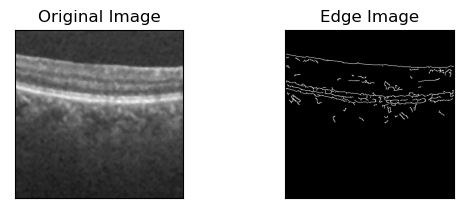

In [3]:
#Canny Edge Detection
def auto_canny(image, sigma=0.33):
    # Compute the median of the single channel pixel intensities
    v = np.median(image)

    # Apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv.Canny(image, lower, upper)

img = cv.medianBlur(img,7)
canny = auto_canny(img)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(canny,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

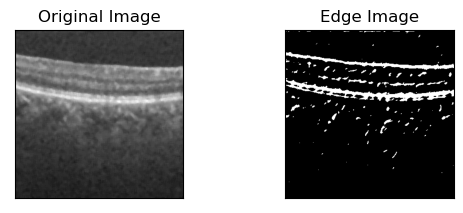

In [4]:
img_blur = cv.medianBlur(img,7)
 
# Sobel Edge Detection
sobely = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=0, dy=1, ksize=5)
sobelx = cv.Sobel(src=img_blur, ddepth=cv.CV_64F, dx=1, dy=0, ksize=5)
sobel = sobely + sobelx
ret,thresh = cv.threshold(sobel,255,255,0)
# Display Sobel Edge Detection Images
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

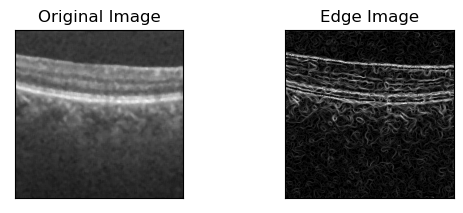

In [5]:
#Robert 1
img_blur = cv.medianBlur(img,7)
roberts_cross_v = np.array( [[1, 0 ], 
                             [0,-1 ]] ) 
  
roberts_cross_h = np.array( [[ 0, 1 ], 
                             [ -1, 0 ]] ) 

vertical = ndimage.convolve( img_blur, roberts_cross_v ) 
horizontal = ndimage.convolve( img_blur, roberts_cross_h ) 
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical)) 
edged_img*=255

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(edged_img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

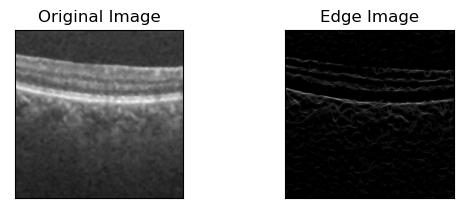

In [6]:
#Robert 2
img_blur2 = cv.medianBlur(img,7)
kernelx = np.array([[1, 0], [0, -1]])
kernely = np.array([[0, 1], [-1, 0]])
img_robertx = cv.filter2D(img_blur2, -1, kernelx)
img_roberty = cv.filter2D(img_blur2, -1, kernely)
grad = cv.addWeighted(img_robertx, 0.5, img_roberty, 0.5, 0)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(grad,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

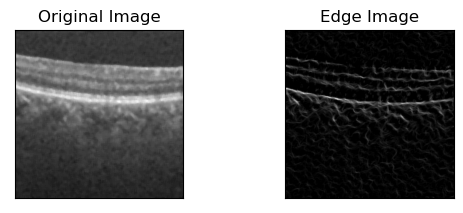

In [7]:
#prewitt
img_blur4 = cv.medianBlur(img,7)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img_blur4, -1, kernelx)
img_prewitty = cv.filter2D(img_blur4, -1, kernely)
prewitt = img_prewittx + img_prewitty
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(prewitt,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

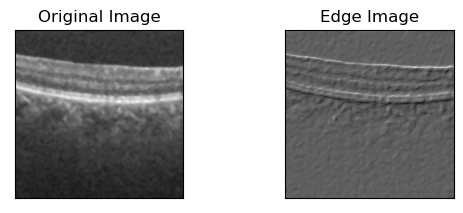

In [8]:
#Scharr Edge Detection

# X gradient Scharr operator
fieldx = cv.Scharr(img_blur4, cv.CV_32F, 1, 0) / 15.36
# Y gradient Scharr operator
fieldy = cv.Scharr(img_blur4, cv.CV_32F, 0, 1) / 15.36
scharr = fieldx + fieldy
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(scharr,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

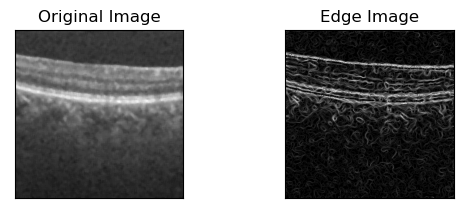

In [9]:
#combine all edge detection into one image
final = scharr+prewitt+grad+edged_img+thresh+canny
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(final,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

In [ ]:
minLineLength = 30
maxLineGap = 5
lines = cv.HoughLinesP(dst,cv.HOUGH_PROBABILISTIC, np.pi/180, 30, minLineLength,maxLineGap)
for x in range(0, len(lines)):
    for x1,y1,x2,y2 in lines[x]:
        #cv2.line(inputImage,(x1,y1),(x2,y2),(0,128,0),2, cv2.LINE_AA)
        pts = np.array([[x1, y1 ], [x2 , y2]], np.int32)
        cv.polylines(img, [pts], True, (0,255,0))

In [ ]:
cv.imwrite('houghlines5.jpg',img)